In [3]:
import pandas as pd

A = pd.read_csv("A.csv").values
import numpy as np

x = np.array(A[:, 0:3].astype(np.float32))
x = np.hstack([x, np.ones([len(x[:, 0]), 1])])

y = np.array(A[:, 3:5].astype(np.float32))
from homography import Transformer

t = Transformer()
t.fit_homography(x, y)
import pickle

with open('./transformer.pickle', 'wb') as f:
    pickle.dump(t, f)

In [5]:
import pandas as pd

A = pd.read_csv("units_6100_gt.csv")

In [6]:
camera = A.loc[A['name']=='Camera']
c_x, c_y = float(camera['pos.x']), float(camera['pos.y'])

In [7]:
A.drop(A[A['name']=='Camera'].index, inplace=True)

In [8]:
A['pos.x'] -= c_x
A['pos.y'] -= c_y

In [9]:
from homography import Transformer
import pickle

with open("./transformer.pickle", 'rb') as f:
    t = pickle.load(f)

uv = t.homography_transform(A[['pos.x', 'pos.y', 'pos.z']].values)

In [10]:
A['u'] = uv[:, 0]
A['v'] = uv[:, 1]
A

,name,unit_type,owner,pos.x,pos.y,pos.z,radius,is_on_screen,feature_x,feature_y,wbs_expected,u,v
1,Barracks,21,2,-5.960938,2.410156,11.991103,1.8125,True,64.416667,102.291667,True,0.137100,0.354430
2,Bunker,24,1,3.039062,12.410156,9.989228,1.8125,True,160.416667,-4.375000,False,0.594657,-0.215207
3,Bunker,24,2,-8.960938,4.410156,11.989014,1.8125,True,32.416667,80.958333,True,-0.058064,0.233160
4,Bunker,24,2,-2.960938,-0.589844,11.985962,1.8125,True,96.416667,134.291667,True,0.321842,0.523079
5,Bunker,24,1,7.039062,10.410156,9.987030,1.8125,True,203.083333,16.958333,True,0.809667,-0.089017
6,Factory,27,1,3.039062,21.410156,9.989228,1.8125,True,160.416667,-100.375000,False,0.599004,-0.676272
7,Factory,27,2,3.039062,-4.589844,11.985962,1.8125,True,160.416667,176.958333,True,0.666629,0.734727
8,Factory,27,1,5.039062,16.410156,9.989228,1.8125,True,181.750000,-47.041667,False,0.706261,-0.403241
9,FactoryTechLab,39,2,5.539062,-5.089844,11.985962,1.1250,True,187.083333,182.291667,True,0.801472,0.758652
10,LabMineralField,665,16,-19.460938,9.410156,7.988098,1.1250,True,-79.583333,27.625000,False,-1.025474,-0.316098


In [11]:
A['w'] = A['radius']*t.x_scale
A['h'] = A['radius']*t.y_scale
A

,name,unit_type,owner,pos.x,pos.y,pos.z,radius,is_on_screen,feature_x,feature_y,wbs_expected,u,v,w,h
1,Barracks,21,2,-5.960938,2.410156,11.991103,1.8125,True,64.416667,102.291667,True,0.137100,0.354430,0.189932,0.207872
2,Bunker,24,1,3.039062,12.410156,9.989228,1.8125,True,160.416667,-4.375000,False,0.594657,-0.215207,0.189932,0.207872
3,Bunker,24,2,-8.960938,4.410156,11.989014,1.8125,True,32.416667,80.958333,True,-0.058064,0.233160,0.189932,0.207872
4,Bunker,24,2,-2.960938,-0.589844,11.985962,1.8125,True,96.416667,134.291667,True,0.321842,0.523079,0.189932,0.207872
5,Bunker,24,1,7.039062,10.410156,9.987030,1.8125,True,203.083333,16.958333,True,0.809667,-0.089017,0.189932,0.207872
6,Factory,27,1,3.039062,21.410156,9.989228,1.8125,True,160.416667,-100.375000,False,0.599004,-0.676272,0.189932,0.207872
7,Factory,27,2,3.039062,-4.589844,11.985962,1.8125,True,160.416667,176.958333,True,0.666629,0.734727,0.189932,0.207872
8,Factory,27,1,5.039062,16.410156,9.989228,1.8125,True,181.750000,-47.041667,False,0.706261,-0.403241,0.189932,0.207872
9,FactoryTechLab,39,2,5.539062,-5.089844,11.985962,1.1250,True,187.083333,182.291667,True,0.801472,0.758652,0.117889,0.129024
10,LabMineralField,665,16,-19.460938,9.410156,7.988098,1.1250,True,-79.583333,27.625000,False,-1.025474,-0.316098,0.117889,0.129024


In [12]:
yolo_data = A[['unit_type', 'u', 'v', 'w', 'h']].values
yolo_data

array([[ 2.10000000e+01,  1.37100240e-01,  3.54429969e-01,
         1.89932352e-01,  2.07872170e-01],
       [ 2.40000000e+01,  5.94657465e-01, -2.15206838e-01,
         1.89932352e-01,  2.07872170e-01],
       [ 2.40000000e+01, -5.80644327e-02,  2.33159522e-01,
         1.89932352e-01,  2.07872170e-01],
       [ 2.40000000e+01,  3.21842213e-01,  5.23078763e-01,
         1.89932352e-01,  2.07872170e-01],
       [ 2.40000000e+01,  8.09666669e-01, -8.90170270e-02,
         1.89932352e-01,  2.07872170e-01],
       [ 2.70000000e+01,  5.99003944e-01, -6.76271694e-01,
         1.89932352e-01,  2.07872170e-01],
       [ 2.70000000e+01,  6.66628982e-01,  7.34727287e-01,
         1.89932352e-01,  2.07872170e-01],
       [ 2.70000000e+01,  7.06260945e-01, -4.03241358e-01,
         1.89932352e-01,  2.07872170e-01],
       [ 3.90000000e+01,  8.01472152e-01,  7.58651759e-01,
         1.17889046e-01,  1.29024105e-01],
       [ 6.65000000e+02, -1.02547425e+00, -3.16097753e-01,
         1.17889046e-01

In [13]:
import pybboxes as pbx
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("tick_6100.png")

for box in yolo_data.tolist():
    b = pbx.YoloBoundingBox(box[1], box[2], box[3], box[4], (t.image_size, t.image_size))
    b = pbx.convert_bbox(b, to_type="voc")
    cv2.rectangle(img, (b[0], b[1]), (b[2], b[3]), (0, 0, 255), 1)


cv2.imwrite("tick_6100_boxes.png", img)

True

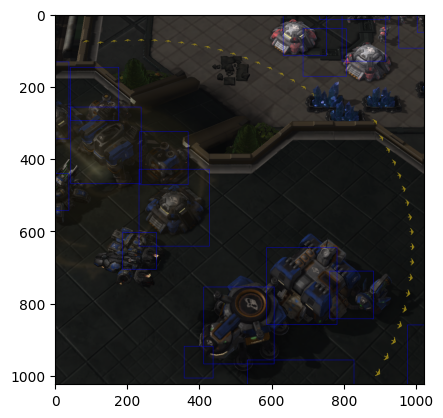

In [14]:
plt.imshow(img)
plt.show()